In [57]:
#instalando a biblioteca
!pip install plotly==4.1.0


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
#realizando os imports
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [59]:
#importando a base de dados
df = pd.read_csv('data/Wine.csv')

In [60]:
#printando na tela a quantidade de linhas e colunas, separando por amostra e atributo
print("O dado possui", df.shape[0], "amostras e", df.shape[1], "atributos")
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [61]:
#renomeando os atributos
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

In [62]:
colunas = df.columns
colunas

Index(['Alcool', 'Malic_Acid', 'Po', 'Alcalinidade_po', 'Magnesio',
       'Total_Fenois', 'Flavanoids', 'Fenois_nao_flavalonoides',
       'Proanthocyanins', 'Intensidade_de_cor', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [63]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [64]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [65]:
#verificando a correlação do dados
matriz_corr = df.corr()

In [66]:
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Fenois,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Fenois_nao_flavalonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [67]:
!pip install biokit


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
#importanto biblioteca para construção do grafico e plotagem.
from biokit.viz import corrplot
import matplotlib.pyplot as plt

C:\Users\Renato\AppData\Local\Temp/ipykernel_9608/4072610561.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



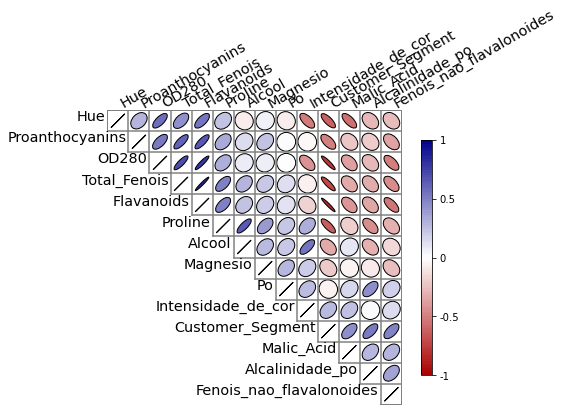

In [69]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper= 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

In [70]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [71]:
#colando os atributos variando na mesma faixa, ou seja, de 0 a 1 ou de -1 a 1.
#utilizaremos o processo de normalização
atributos = df.columns

In [72]:
atributos

Index(['Alcool', 'Malic_Acid', 'Po', 'Alcalinidade_po', 'Magnesio',
       'Total_Fenois', 'Flavanoids', 'Fenois_nao_flavalonoides',
       'Proanthocyanins', 'Intensidade_de_cor', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [73]:
for atributo in atributos:
    df[atributo] = (df[atributo]-min(df[atributo]))/(max(df[atributo])- min(df[atributo]))

In [74]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [75]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
#biblioteca pronta para normalização
from sklearn import preprocessing

In [77]:
#estanciando a funcão para utilizar a trasformação dos dados
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

In [78]:
df = pd.DataFrame(np_df, columns = colunas)

In [79]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
np_df = min_max_scaler.inverse_transform(df)

In [81]:
df_nao_normalizado = pd.DataFrame(np_df, columns = colunas)
df_nao_normalizado.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
#cluterização dos dados com kmeans
from sklearn.cluster import KMeans

In [83]:
#agrupando os dados, intanciar o cluster
agrupador = KMeans(n_clusters = 4)


In [84]:
agrupador.fit(df)

C:\Users\Renato\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4)

In [85]:
labels = agrupador.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 0 2 2 2 0 2 0 2 2 2
 2 0 2 0 2 2 2 2 0 0 2 2 0 2 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2
 2 0 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [86]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'], 
                        mode = 'markers',
                        marker = dict(color = agrupador.labels_.astype(np.float)), 
                        text = labels))

fig.show()

C:\Users\Renato\AppData\Local\Temp/ipykernel_9608/3937604883.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [87]:
agrupador = KMeans(n_clusters = 3)
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

C:\Users\Renato\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [88]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'], 
                        mode = 'markers',
                        marker = dict(color = agrupador.labels_.astype(np.float)), 
                        text = labels))

fig.show()

C:\Users\Renato\AppData\Local\Temp/ipykernel_9608/3937604883.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [89]:
#plotando o grafico de 3d
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'], 
                           y = df['Alcool'],
                           z = df['Proline'],
                           mode = 'markers',
                           marker = dict(color = agrupador.labels_.astype(np.float)), 
                           text = labels))

fig.show()

C:\Users\Renato\AppData\Local\Temp/ipykernel_9608/2163207207.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [90]:
#renomeando os eixos e plotando novamente
fig.update_layout(scene = dict(
    xaxis_title = 'Intesidade de cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline'
))
fig.show()

In [91]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = colunas
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000
1,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
2,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796


In [92]:
#Plotando em conjunto o centro dos dados
fig.add_trace(go.Scatter3d(x = centros['Intensidade_de_cor'], 
                           y = centros['Alcool'],
                           z = centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'red'), 
                           text = [0, 1, 2]))

fig.show()

In [93]:
#clusterização com DBScan, funciona dados de muita densidade
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps= 1.31, min_samples= 15, metric= 'manhattan')
agrupador.fit(df)


DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [94]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [95]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [96]:
#eps é o espaçamento dos dados
agrupador = DBSCAN(eps= 1.5, min_samples= 15, metric= 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [97]:
#biblioteca no qual não necessita de muitos parametros para cluster
from sklearn.cluster import MeanShift

In [98]:
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [99]:
#biblioteca com funcao para definir regiao e realizar o deslocamento de media 
from sklearn.cluster import estimate_bandwidth

In [105]:
#Define a quantidade de pontos e ordena eles
BW = estimate_bandwidth(df, quantile= 0.1)
agrupador = MeanShift(bandwidth = BW)
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  8,  1,  1,  1,  5,  1,  1,  1,  1,
        1,  3,  1,  5,  1,  7,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3, 10,  1,  1, 13,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 12,  1,  1,  1,  1, 13,  1,  1,  1,
        1,  1, 11,  6,  6,  9,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  4,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [106]:
agrupador.cluster_centers_

array([[0.70531189, 0.24681599, 0.57892652, 0.33858343, 0.39070048,
        0.63422733, 0.54938272, 0.29280224, 0.45735483, 0.35831437,
        0.46732912, 0.69495319, 0.59238125, 0.        ],
       [0.30943517, 0.1844693 , 0.45911047, 0.48994217, 0.21182397,
        0.40824222, 0.35381291, 0.41463415, 0.3495422 , 0.14034796,
        0.47332937, 0.58777808, 0.14867263, 0.5       ],
       [0.56268556, 0.54966048, 0.56465104, 0.54665609, 0.30379041,
        0.21998232, 0.07573299, 0.6303822 , 0.21184179, 0.51260173,
        0.16927246, 0.16586832, 0.2617689 , 1.        ],
       [0.34385965, 0.09749671, 0.32442068, 0.32302405, 0.86594203,
        0.38045977, 0.30801688, 0.26415094, 0.76866456, 0.14249147,
        0.55826558, 0.51282051, 0.37351403, 0.5       ],
       [0.75789474, 0.18478261, 0.70053476, 0.67783505, 0.25543478,
        0.59310345, 0.18248945, 0.74528302, 0.65772871, 0.94667235,
        0.07317073, 0.21978022, 0.25820257, 1.        ],
       [0.74473684, 0.15217391, 0.7

In [107]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                         y=df['Alcool'], z=df['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

C:\Users\Renato\AppData\Local\Temp/ipykernel_9608/4069099307.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [108]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

In [109]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos

In [114]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                         y=centros['Alcool'], z=centros['Proline'],
                         mode = 'markers',                  
                          marker = dict(color = 'red'),
                        text = [0, 1, 2]))

In [113]:
agrupador  =KMeans(n_clusters= 5)
agrupador.fit(df)
labels = agrupador.labels_
labels

C:\Users\Renato\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 3, 0, 4, 0,
       0, 3, 4, 3, 4, 0, 3, 0, 0, 3, 3, 4, 3, 0, 3, 3, 4, 4, 0, 3, 4, 4,
       4, 3, 4, 4, 4, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 4, 3, 4, 3, 0,
       0, 3, 4, 4, 3, 4, 3, 3, 4, 3, 0, 0, 4, 0, 0, 3, 0, 4, 3, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [117]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                        y=df['Alcool'], 
                        z=df['Proline'],
                        mode = 'markers',                  
                        marker = dict(color = labels.astype(np.float)),
                        text = labels))

C:\Users\Renato\AppData\Local\Temp/ipykernel_9608/4242361468.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [118]:
#Coeficiente de silhuetas
from sklearn.metrics import silhouette_score

In [119]:
faixa_n_clusters = [i for i in range(2,10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [122]:
from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters= k)
    labels = agrupador.fit_predict(df)
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)

C:\Users\Renato\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Renato\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Renato\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Renato\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

In [123]:
fig =go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title="Coeficiente de Silhueta K-means",
    xaxis_title="Valores de ‘k’ ",
    yaxis_title="Coeficiente de Silhueta",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [133]:
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [134]:
valores_silhueta = []
quantil_plot = []
for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(df, quantile= quantil)
    agrupador = MeanShift(bandwidth= bandwidth)
    labels = agrupador.fit_predict(df)
    if(len(np.unique(labels)) < len(df) and len(np.unique(labels)) >1):
        media_silhueta = silhouette_score(df, labels)
        valores_silhueta.append(media_silhueta)
        quantil_plot.append(quantil)

In [135]:
fig =go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot, y = valores_silhueta))
fig.update_layout(
    title="Coeficiente de Silhueta para o Mean shift",
    xaxis_title="Valores dos quantis",
    yaxis_title="Coeficiente de Silhueta",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [136]:
#comparação entre os clusters
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [138]:
agrupador_kmeans = KMeans(n_clusters= 3)
agrupador_DBSCAN = DBSCAN(eps= 2.1, min_samples= 56, metric= 'manhattan')

BW = estimate_bandwidth(df, quantile= 0.28)
agrupador_meanshift = MeanShift(bandwidth= BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_DBSCAN.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels_DBSCAN: ", labels_dbscan)
print("Labels_MeanShift: ", labels_meanshift)

C:\Users\Renato\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Labels K-means:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels_DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels_MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [139]:
#melhor metodo de agrupamento é o Kmeans
print("O coeficiente de Silhoueta do K-means é: ", silhouette_score(df, labels_kmeans))
print("O coeficiente de Silhoueta do DBSCAN é: ", silhouette_score(df, labels_dbscan))
print("O coeficiente de Silhoueta do MeanShift é: ", silhouette_score(df, labels_meanshift))

O coeficiente de Silhoueta do K-means é:  0.3695061849273629
O coeficiente de Silhoueta do DBSCAN é:  0.30162321150943744
O coeficiente de Silhoueta do MeanShift é:  0.3059152866115628


In [140]:
# definindo os melhores valores de parametros para o DBSCAN
#20 valores para cada parâmetro.
faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

In [142]:
from collections import Counter

In [143]:
valores_silhueta = []
eps_plot = []
min_samples_plot = []
for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(df)
    labels = agrupador.labels_
    if(Counter(labels)[0] < len(df) and Counter(labels)[0] > 1): #porque não é possível calcular
    # silhueta para apenas  um cluster ou para número de clústeres igual
    # ao número de dados 
      media_silhueta = silhouette_score(df, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

In [144]:
ind = valores_silhueta.index(max(valores_silhueta))
#@title Default title text
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[min_samples_plot[ind]],
                         y = [eps_plot[ind]], z = [max(valores_silhueta)],
                         mode = 'markers',marker_line_color="midnightblue", 
                          marker_symbol=['x']))
fig.add_trace(go.Scatter3d(x=min_samples_plot,
                         y = eps_plot, z = valores_silhueta,
                         mode = 'markers',
                        text = labels))
fig.update_layout(scene = dict(
                    xaxis_title='eps',
                    yaxis_title='min_samples',
                    zaxis_title='silhueta'))
fig.show()

In [145]:
# pega o índice do vamior valor do coeficiente de silhueta
ind = valores_silhueta.index(max(valores_silhueta))
# printa os valores de eps e min_samples para o maior valor de coeficiente de silhueta encontrado
print(eps_plot[ind])
print(min_samples_plot[ind])

2.7
81


In [147]:
#mesmo melhorando os parametros o Kmeans ainda é melhor
print(max(valores_silhueta))

0.3584231880254969
